<a href="https://colab.research.google.com/github/PinRay22/BA/blob/main/RLweek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 清除可能干擾的舊版本
!pip -q uninstall -y numpy scipy gensim >/dev/null

# 安裝彼此相容、在 Colab/py3.12 上穩定可用的版本
!pip -q install numpy==1.26.4 scipy==1.11.4 gensim==4.3.3

# —— 重要 ——
# 重新啟動 Runtime 以載入新的二進位相依（避免 dtype size changed 類型錯誤）
import IPython, time
print("已安裝相容版本，將自動重新啟動執行階段……")
time.sleep(1)
IPython.display.clear_output()
IPython.get_ipython().kernel.do_shutdown(True)


{'status': 'ok', 'restart': True}

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


=== 關鍵配對相似度 ===
sim(football,tennis) = 0.9915
sim(movies,books) = 0.9798
sim(playing,watching) = 0.9801
sim(playing,reading) = 0.9702
sim(love,likes) = 0.9780

最接近 'football' 的詞（Top-5）：
  and         0.9951
  on          0.9948
  weekends    0.9942
  baseball    0.9941
  he          0.9940


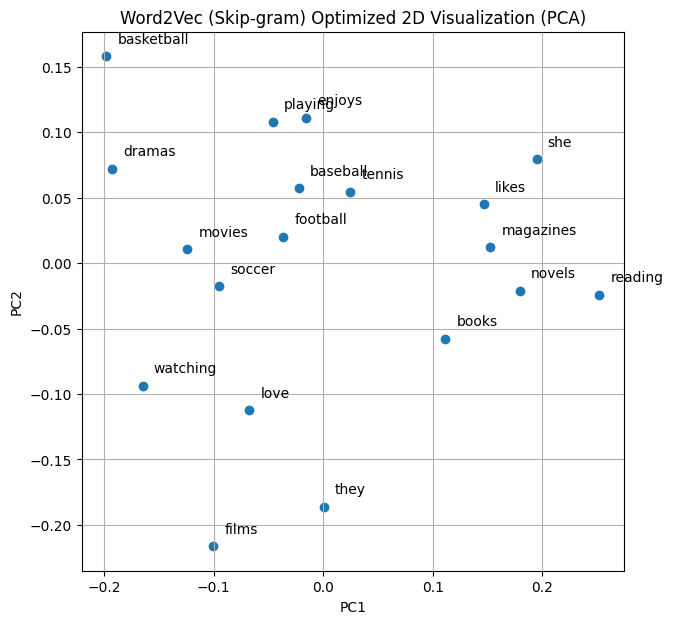

In [3]:
# === 安裝相容套件版本 ===
!pip -q uninstall -y numpy scipy gensim >/dev/null
!pip -q install numpy==1.26.4 scipy==1.11.4 gensim==4.3.3

# === 安裝中文字型，避免 Matplotlib 警告 ===
!apt-get -y install fonts-noto-cjk >/dev/null
import matplotlib
matplotlib.rcParams['font.family'] = 'Noto Sans CJK TC'

import random, numpy as np, matplotlib.pyplot as plt
from gensim.models import Word2Vec

SEED = 42
random.seed(SEED); np.random.seed(SEED)

# === 擴充語料 ===
corpus = [
    "I love playing football and I love watching movies",
    "She likes playing tennis and she likes reading books",
    "We enjoy playing basketball and volleyball after school",
    "They love watching films and going to the cinema",
    "I like reading novels and she likes reading magazines",
    "He enjoys playing baseball and football on weekends",
    "My friends love playing soccer and tennis together",
    "We all enjoy watching dramas and animated movies",
    "They like reading newspapers and different books",
    "She enjoys playing badminton and table tennis"
]
sentences = [s.lower().split() for s in corpus]

# === 訓練 Skip-gram Word2Vec ===
model = Word2Vec(
    sentences=sentences,
    vector_size=50,   # 增加維度：更豐富的表徵
    window=4,         # 更大的上下文
    min_count=1,      # 不忽略低頻詞
    sg=1,             # Skip-gram
    negative=10,      # 負採樣數量
    workers=2,
    epochs=500,       # 訓練更多次數，讓小語料收斂
    seed=SEED
)

# === 檢查相似度 ===
pairs = [("football","tennis"), ("movies","books"), ("playing","watching"), ("playing","reading"), ("love","likes")]
print("=== 關鍵配對相似度 ===")
for a,b in pairs:
    if a in model.wv and b in model.wv:
        print(f"sim({a},{b}) = {model.wv.similarity(a,b):.4f}")

# === Top-N 最相似詞 ===
target = "football"
print(f"\n最接近 '{target}' 的詞（Top-5）：")
for w, score in model.wv.most_similar(target, topn=5):
    print(f"  {w:10s}  {score:.4f}")

# === 視覺化：PCA（純 numpy 實作） ===
def pca_numpy(X, k=2):
    Xc = X - X.mean(axis=0, keepdims=True)
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    return Xc @ Vt[:k].T

words_to_plot = ["football","tennis","basketball","baseball","soccer",
                 "movies","films","dramas","books","novels","magazines",
                 "playing","watching","reading","love","likes","enjoys","she","they"]
vecs = np.array([model.wv[w] for w in words_to_plot if w in model.wv])
labels = [w for w in words_to_plot if w in model.wv]

vec2d = pca_numpy(vecs, k=2)

plt.figure(figsize=(7,7))
plt.scatter(vec2d[:,0], vec2d[:,1])
for i, txt in enumerate(labels):
    plt.annotate(txt, (vec2d[i,0]+0.01, vec2d[i,1]+0.01))
plt.title("Word2Vec (Skip-gram) Optimized 2D Visualization (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True)
plt.show()



Device: cpu


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch [1/30]  VAE:145.465  D:0.636  G:2.706
Epoch [2/30]  VAE:114.324  D:0.481  G:3.185
Epoch [3/30]  VAE:116.908  D:0.663  G:3.040
Epoch [4/30]  VAE:120.632  D:0.433  G:3.293
Epoch [5/30]  VAE:109.111  D:0.881  G:1.990
Epoch [6/30]  VAE:111.850  D:0.489  G:2.876
Epoch [7/30]  VAE:104.470  D:0.464  G:4.542
Epoch [8/30]  VAE:110.304  D:0.659  G:1.882
Epoch [9/30]  VAE:104.878  D:0.562  G:3.439
Epoch [10/30]  VAE:102.761  D:0.912  G:5.519
Epoch [11/30]  VAE:105.109  D:0.625  G:3.335
Epoch [12/30]  VAE:102.488  D:0.583  G:3.138
Epoch [13/30]  VAE:102.086  D:0.583  G:3.257
Epoch [14/30]  VAE:101.614  D:0.936  G:1.257
Epoch [15/30]  VAE:96.243  D:0.726  G:2.449
Epoch [16/30]  VAE:101.964  D:0.832  G:1.589
Epoch [17/30]  VAE:98.890  D:0.939  G:0.985
Epoch [18/30]  VAE:101.119  D:1.371  G:0.718
Epoch [19/30]  VAE:100.717  D:0.816  G:2.193
Epoch [20/30]  VAE:106.059  D:0.980  G:1.508
Epoch [21/30]  VAE:93.141  D:0.878  G:2.201
Epoch [22/30]  VAE:99.626  D:1.570  G:0.487
Epoch [23/30]  VAE:102.

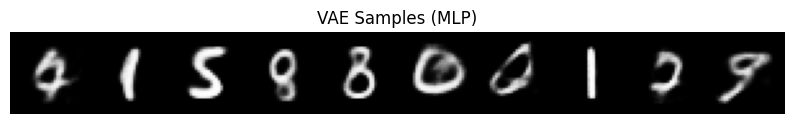

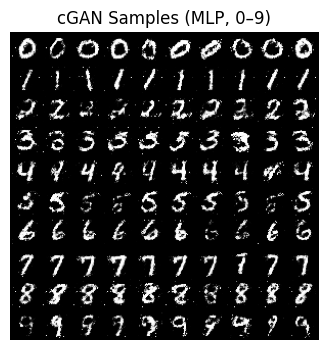

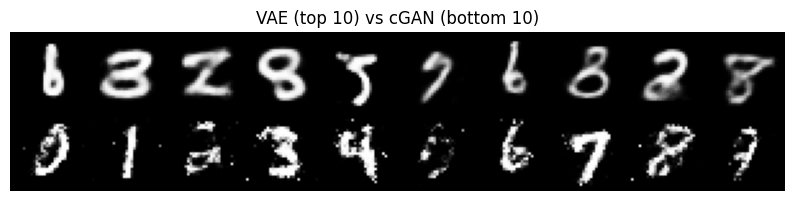

In [3]:
# === 安裝與匯入套件 ===
!pip -q install torch torchvision matplotlib

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np, random

# 固定隨機種子
SEED = 42
torch.manual_seed(SEED); np.random.seed(SEED); random.seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# === 資料集 ===
transform = transforms.Compose([transforms.ToTensor()])
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True, num_workers=2, pin_memory=True
)

# === 畫圖工具 ===
def show_grid(imgs, nrow, title, value_range=None):
    imgs = imgs.detach().cpu()
    if value_range is None:
        grid = utils.make_grid(imgs, nrow=nrow, padding=2, normalize=True)
    else:
        grid = utils.make_grid(imgs, nrow=nrow, padding=2, normalize=True, value_range=value_range)
    plt.figure(figsize=(10,4))
    plt.imshow(grid.permute(1,2,0))
    plt.axis("off"); plt.title(title); plt.show()

# =========================
# VAE (MLP)
# =========================
class VAE(nn.Module):
    def __init__(self, z_dim=32):
        super().__init__()
        # Encoder
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc_mu = nn.Linear(256, z_dim)
        self.fc_logvar = nn.Linear(256, z_dim)
        # Decoder
        self.fc3 = nn.Linear(z_dim, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 784)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc_mu(h), self.fc_logvar(h)

    def reparam(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.fc3(z))
        h = F.relu(self.fc4(h))
        return torch.sigmoid(self.fc5(h))  # [0,1]

    def forward(self, x):
        x = x.view(-1, 784)
        mu, logvar = self.encode(x)
        z = self.reparam(mu, logvar)
        xr = self.decode(z)
        return xr, mu, logvar

def vae_loss(xr, x, mu, logvar):
    bce = F.binary_cross_entropy(xr, x.view(-1, 784), reduction='sum')
    kld = -0.5*torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return (bce + kld) / x.size(0)

vae = VAE(z_dim=32).to(device)
opt_vae = optim.Adam(vae.parameters(), lr=1e-3)

# =========================
# cGAN (MLP)
# =========================
class Generator(nn.Module):
    def __init__(self, nz=100, num_classes=10):
        super().__init__()
        self.embed = nn.Embedding(num_classes, num_classes)
        self.fc1 = nn.Linear(nz + num_classes, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 784)

    def forward(self, z, labels):
        y = self.embed(labels)
        x = torch.cat([z, y], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))  # [-1,1]
        return x.view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.embed = nn.Embedding(num_classes, num_classes)
        self.fc1 = nn.Linear(784 + num_classes, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x, labels):
        y = self.embed(labels)
        x = x.view(-1, 784)
        x = torch.cat([x, y], dim=1)
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        return torch.sigmoid(self.fc3(x))

G = Generator().to(device)
D = Discriminator().to(device)
opt_G = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5,0.999))
opt_D = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5,0.999))
bce = nn.BCELoss()

# =========================
# 訓練
# =========================
EPOCHS = 30
nz = 100

for ep in range(1, EPOCHS+1):
    vae.train(); G.train(); D.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        bs = x.size(0)

        # --- VAE ---
        xr, mu, logvar = vae(x)
        loss_v = vae_loss(xr, x, mu, logvar)
        opt_vae.zero_grad(); loss_v.backward(); opt_vae.step()

        # --- cGAN ---
        x_real = x*2 - 1  # scale to [-1,1]
        real_lbl = torch.full((bs,1), 0.9, device=device)  # label smoothing
        fake_lbl = torch.zeros(bs,1, device=device)

        # Train D
        z = torch.randn(bs, nz, device=device)
        y_fake = torch.randint(0,10,(bs,), device=device)
        x_fake = G(z, y_fake).detach()
        d_real = D(x_real, y)
        d_fake = D(x_fake, y_fake)
        loss_d = bce(d_real, real_lbl) + bce(d_fake, fake_lbl)
        opt_D.zero_grad(); loss_d.backward(); opt_D.step()

        # Train G
        z = torch.randn(bs, nz, device=device)
        y_fake = torch.randint(0,10,(bs,), device=device)
        x_fake = G(z, y_fake)
        d_fake = D(x_fake, y_fake)
        loss_g = bce(d_fake, real_lbl)
        opt_G.zero_grad(); loss_g.backward(); opt_G.step()

    print(f"Epoch [{ep}/{EPOCHS}]  VAE:{loss_v.item():.3f}  D:{loss_d.item():.3f}  G:{loss_g.item():.3f}")

# =========================
# 生成與比較
# =========================
vae.eval(); G.eval()
with torch.no_grad():
    # VAE 隨機生成 (10 張)
    z = torch.randn(10, 32, device=device)
    vae_imgs = vae.decode(z).view(-1,1,28,28)
    show_grid(vae_imgs, nrow=10, title="VAE Samples (MLP)")

    # cGAN 生成 0–9 (每列一個數字，共 10×10)
    rows = []
    for d in range(10):
        z = torch.randn(10, nz, device=device)
        y = torch.full((10,), d, device=device, dtype=torch.long)
        imgs = G(z, y)
        imgs = (imgs + 1)/2  # [-1,1] -> [0,1]
        rows.append(imgs)
    grid = torch.cat(rows, dim=0)
    show_grid(grid, nrow=10, title="cGAN Samples (MLP, 0–9)")

    # 對照：VAE (隨機 10) vs cGAN (指定 0–9 各 1)
    z1 = torch.randn(10, 32, device=device)
    v10 = vae.decode(z1).view(-1,1,28,28)
    z2 = torch.randn(10, nz, device=device)
    y2 = torch.arange(0,10, device=device)
    g10 = (G(z2, y2) + 1)/2
    both = torch.cat([v10, g10], dim=0)
    show_grid(both, nrow=10, title="VAE (top 10) vs cGAN (bottom 10)")


Device: cpu
Epoch [1/30]  GAN D:0.600 G:2.096 | cGAN D:0.602 G:3.257
Epoch [2/30]  GAN D:0.533 G:3.028 | cGAN D:1.429 G:3.599
Epoch [3/30]  GAN D:0.555 G:2.366 | cGAN D:0.765 G:3.602
Epoch [4/30]  GAN D:0.766 G:1.244 | cGAN D:0.687 G:1.942
Epoch [5/30]  GAN D:0.481 G:2.571 | cGAN D:0.495 G:3.187
Epoch [6/30]  GAN D:0.566 G:3.229 | cGAN D:0.704 G:1.486
Epoch [7/30]  GAN D:0.559 G:2.675 | cGAN D:0.554 G:4.185
Epoch [8/30]  GAN D:0.564 G:2.690 | cGAN D:0.560 G:2.969
Epoch [9/30]  GAN D:0.862 G:0.946 | cGAN D:0.609 G:2.013
Epoch [10/30]  GAN D:0.580 G:2.115 | cGAN D:0.585 G:2.338
Epoch [11/30]  GAN D:0.733 G:3.112 | cGAN D:1.071 G:2.394
Epoch [12/30]  GAN D:0.683 G:2.475 | cGAN D:0.936 G:1.077
Epoch [13/30]  GAN D:0.935 G:1.499 | cGAN D:0.692 G:1.722
Epoch [14/30]  GAN D:0.813 G:1.413 | cGAN D:0.734 G:2.733
Epoch [15/30]  GAN D:0.782 G:3.518 | cGAN D:0.796 G:4.127
Epoch [16/30]  GAN D:0.787 G:1.824 | cGAN D:0.760 G:2.323
Epoch [17/30]  GAN D:1.009 G:0.925 | cGAN D:0.835 G:1.197
Epoch [18/3

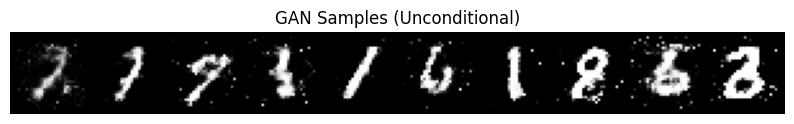

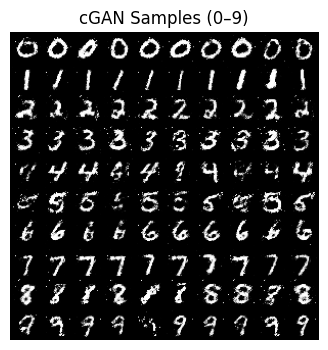

In [4]:
# === 安裝與匯入 ===
!pip -q install torch torchvision matplotlib

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np, random

# 固定種子
SEED = 42
torch.manual_seed(SEED); np.random.seed(SEED); random.seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# === 資料 ===
transform = transforms.Compose([transforms.ToTensor()])  # [0,1]
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True, num_workers=2, pin_memory=True
)

def show_grid(imgs, nrow, title):
    imgs = imgs.detach().cpu()
    grid = utils.make_grid(imgs, nrow=nrow, padding=2, normalize=True, value_range=(0,1))
    plt.figure(figsize=(10,4)); plt.imshow(grid.permute(1,2,0))
    plt.axis("off"); plt.title(title); plt.show()

# =========================
#  一、GAN（無條件，MLP）
# =========================
class G_GAN(nn.Module):
    def __init__(self, nz=100):
        super().__init__()
        self.fc1 = nn.Linear(nz, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 784)
    def forward(self, z):
        x = F.relu(self.fc1(z))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))  # [-1,1]
        return x.view(-1,1,28,28)

class D_GAN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
    def forward(self, x):
        x = x.view(-1,784)
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        return torch.sigmoid(self.fc3(x))

nz = 100
G_u = G_GAN(nz).to(device)
D_u = D_GAN().to(device)
opt_Gu = optim.Adam(G_u.parameters(), lr=2e-4, betas=(0.5,0.999))
opt_Du = optim.Adam(D_u.parameters(), lr=2e-4, betas=(0.5,0.999))
bce = nn.BCELoss()

# =========================
#  二、cGAN（條件式，MLP）
# =========================
class G_cGAN(nn.Module):
    def __init__(self, nz=100, num_classes=10):
        super().__init__()
        self.emb = nn.Embedding(num_classes, num_classes)  # one-hot-like
        self.fc1 = nn.Linear(nz + num_classes, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 784)
    def forward(self, z, y):
        yv = self.emb(y)
        x = torch.cat([z, yv], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x.view(-1,1,28,28)

class D_cGAN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.emb = nn.Embedding(num_classes, num_classes)
        self.fc1 = nn.Linear(784 + num_classes, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
    def forward(self, x, y):
        yv = self.emb(y)
        x = x.view(-1,784)
        x = torch.cat([x, yv], dim=1)
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        return torch.sigmoid(self.fc3(x))

G_c = G_cGAN(nz).to(device)
D_c = D_cGAN().to(device)
opt_Gc = optim.Adam(G_c.parameters(), lr=2e-4, betas=(0.5,0.999))
opt_Dc = optim.Adam(D_c.parameters(), lr=2e-4, betas=(0.5,0.999))

# =========================
#  訓練
# =========================
EPOCHS = 30

for ep in range(1, EPOCHS+1):
    G_u.train(); D_u.train(); G_c.train(); D_c.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        bs = x.size(0)
        x_real_u = x*2 - 1         # [-1,1]
        real_lbl = torch.full((bs,1), 0.9, device=device)  # label smoothing for both
        fake_lbl = torch.zeros(bs,1, device=device)

        # ---- (A) GAN 無條件 ----
        # Train D_u
        z = torch.randn(bs, nz, device=device)
        x_fake_u = G_u(z).detach()
        du_real = D_u(x_real_u)
        du_fake = D_u(x_fake_u)
        loss_du = bce(du_real, real_lbl) + bce(du_fake, fake_lbl)
        opt_Du.zero_grad(); loss_du.backward(); opt_Du.step()

        # Train G_u
        z = torch.randn(bs, nz, device=device)
        x_fake_u = G_u(z)
        du_fake = D_u(x_fake_u)
        loss_gu = bce(du_fake, real_lbl)
        opt_Gu.zero_grad(); loss_gu.backward(); opt_Gu.step()

        # ---- (B) cGAN 條件式 ----
        x_real_c = x_real_u
        # Train D_c
        z = torch.randn(bs, nz, device=device)
        y_fake = torch.randint(0,10,(bs,), device=device)
        x_fake_c = G_c(z, y_fake).detach()
        dc_real = D_c(x_real_c, y)
        dc_fake = D_c(x_fake_c, y_fake)
        loss_dc = bce(dc_real, real_lbl) + bce(dc_fake, fake_lbl)
        opt_Dc.zero_grad(); loss_dc.backward(); opt_Dc.step()

        # Train G_c
        z = torch.randn(bs, nz, device=device)
        y_fake = torch.randint(0,10,(bs,), device=device)
        x_fake_c = G_c(z, y_fake)
        dc_fake = D_c(x_fake_c, y_fake)
        loss_gc = bce(dc_fake, real_lbl)
        opt_Gc.zero_grad(); loss_gc.backward(); opt_Gc.step()

    print(f"Epoch [{ep}/{EPOCHS}]  "
          f"GAN D:{loss_du.item():.3f} G:{loss_gu.item():.3f} | "
          f"cGAN D:{loss_dc.item():.3f} G:{loss_gc.item():.3f}")

# =========================
#  生成與可視化
# =========================
G_u.eval(); G_c.eval()
with torch.no_grad():
    # GAN：隨機 10 張
    z = torch.randn(10, nz, device=device)
    gan_imgs = (G_u(z) + 1)/2  # -> [0,1]
    show_grid(gan_imgs, nrow=10, title="GAN Samples (Unconditional)")

    # cGAN：0–9 各 10 張（10×10）
    rows = []
    for d in range(10):
        z = torch.randn(10, nz, device=device)
        y = torch.full((10,), d, device=device, dtype=torch.long)
        imgs = (G_c(z, y) + 1)/2
        rows.append(imgs)
    cgan_grid = torch.cat(rows, dim=0)
    show_grid(cgan_grid, nrow=10, title="cGAN Samples (0–9)")


Device: cuda
Epoch 1/30  Loss: 0.2766
Epoch 2/30  Loss: 0.1146
Epoch 3/30  Loss: 0.0964
Epoch 4/30  Loss: 0.0868
Epoch 5/30  Loss: 0.0820
Epoch 6/30  Loss: 0.0790
Epoch 7/30  Loss: 0.0753
Epoch 8/30  Loss: 0.0732
Epoch 9/30  Loss: 0.0722
Epoch 10/30  Loss: 0.0702
Epoch 11/30  Loss: 0.0696
Epoch 12/30  Loss: 0.0684
Epoch 13/30  Loss: 0.0681
Epoch 14/30  Loss: 0.0672
Epoch 15/30  Loss: 0.0673
Epoch 16/30  Loss: 0.0665
Epoch 17/30  Loss: 0.0663
Epoch 18/30  Loss: 0.0650
Epoch 19/30  Loss: 0.0647
Epoch 20/30  Loss: 0.0647
Epoch 21/30  Loss: 0.0647
Epoch 22/30  Loss: 0.0633
Epoch 23/30  Loss: 0.0634
Epoch 24/30  Loss: 0.0639
Epoch 25/30  Loss: 0.0636
Epoch 26/30  Loss: 0.0625
Epoch 27/30  Loss: 0.0627
Epoch 28/30  Loss: 0.0622
Epoch 29/30  Loss: 0.0626
Epoch 30/30  Loss: 0.0621


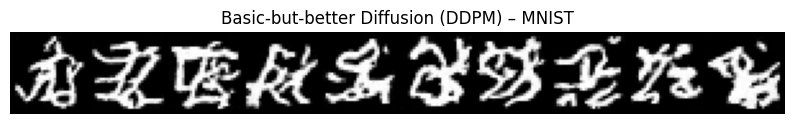

In [2]:
# ====== Basic-but-better DDPM for MNIST (still very simple) ======
!pip -q install torch torchvision matplotlib

import torch, torch.nn as nn, torch.nn.functional as F, torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np, random

# ------------------ 基本設定 ------------------
SEED = 42
torch.manual_seed(SEED); np.random.seed(SEED); random.seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ------------------ 資料：[-1,1] ------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*2 - 1)  # [-1,1]
])
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True, num_workers=2, pin_memory=True
)

# ------------------ Diffusion 參數 ------------------
T = 100                                             # 入門：步數別太大
beta = torch.linspace(1e-4, 0.02, T).to(device)     # 線性排程
alpha = 1.0 - beta
alpha_bar = torch.cumprod(alpha, dim=0)

# ------------------ 最基礎的小 CNN（一次 down/up + skip）------------------
class TinyUNet(nn.Module):
    def __init__(self, base=64):  # <== 寬度從 32 提到 64
        super().__init__()
        c = base
        self.enc1 = nn.Sequential(
            nn.Conv2d(2, c, 3, padding=1), nn.SiLU(),              # SiLU 比 ReLU 穩一些
            nn.Conv2d(c, c, 3, padding=1), nn.SiLU(),
        )
        self.down = nn.Conv2d(c, c*2, 4, stride=2, padding=1)      # 28->14
        self.mid  = nn.Sequential(
            nn.SiLU(),
            nn.Conv2d(c*2, c*2, 3, padding=1), nn.SiLU(),
        )
        self.up   = nn.ConvTranspose2d(c*2, c, 4, stride=2, padding=1)  # 14->28
        self.dec1 = nn.Sequential(
            nn.SiLU(),
            nn.Conv2d(c+c, c, 3, padding=1), nn.SiLU(),
            nn.Conv2d(c, 1, 1)  # 預測噪聲 ε
        )

    def forward(self, x, t):                # x:(B,1,28,28), t:(B,)
        # 把 t/T 做成常數通道與影像拼接（最基礎做法）
        t_map = (t.float()/T).view(-1,1,1,1).expand(-1,1,28,28)
        xt = torch.cat([x, t_map], dim=1)
        h1 = self.enc1(xt)
        h2 = self.down(h1)
        h3 = self.mid(h2)
        u  = self.up(h3)
        out = self.dec1(torch.cat([u, h1], dim=1))  # skip-connection
        return out

model = TinyUNet(base=64).to(device)
opt = optim.Adam(model.parameters(), lr=2e-4)       # lr 降低一點更穩
mse = nn.MSELoss()

# ------------------ 訓練（梯度裁剪）------------------
EPOCHS = 30  # <== 從 10 提到 30，清晰度提升關鍵
for ep in range(1, EPOCHS+1):
    model.train()
    total = 0.0; n = 0
    for x,_ in train_loader:
        x0 = x.to(device)                   # [-1,1]
        b  = x0.size(0)
        t  = torch.randint(0, T, (b,), device=device)
        noise = torch.randn_like(x0)

        a_bar_t = alpha_bar[t].view(b,1,1,1)
        x_t = torch.sqrt(a_bar_t)*x0 + torch.sqrt(1-a_bar_t)*noise   # q(x_t|x0)
        pred = model(x_t, t)                                         # 預測噪聲 ε
        loss = mse(pred, noise)

        opt.zero_grad(); loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)      # 簡單的穩定器
        opt.step()
        total += loss.item()*b; n += b
    print(f"Epoch {ep}/{EPOCHS}  Loss: {total/n:.4f}")

# ------------------ 取樣（DDPM 反向去噪）------------------
@torch.no_grad()
def sample(n=10):
    model.eval()
    x = torch.randn(n, 1, 28, 28, device=device)
    for t in reversed(range(T)):
        tb = torch.full((n,), t, device=device, dtype=torch.long)
        eps = model(x, tb)
        a, ab, b = alpha[t], alpha_bar[t], beta[t]
        mean = (1/torch.sqrt(a))*(x - ((1-a)/torch.sqrt(1-ab))*eps)
        if t > 0:
            x = mean + torch.sqrt(b)*torch.randn_like(x)
        else:
            x = mean
    return x

# 顯示 10 張
imgs = sample(10)
grid = utils.make_grid((imgs.clamp(-1,1)+1)/2, nrow=10, padding=2).cpu().numpy()
plt.figure(figsize=(10,2)); plt.imshow(np.transpose(grid, (1,2,0))); plt.axis("off")
plt.title("Basic-but-better Diffusion (DDPM) – MNIST"); plt.show()
